In [161]:
import zipfile
with zipfile.ZipFile('/content/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/titanic')

Импорт библиотек


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Предобработка данных

* Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
* Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
* При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

Прочитаем датасет

In [163]:
df = pd.read_csv('/content/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Первичная информация

In [164]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

Чистка данных

In [165]:

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='male' else 0)
df['Embarked'] = df['Embarked'].apply(lambda x: 0 if x == 'S' else (1 if x == 'C' else 2))
df.drop(columns=['Ticket', 'Cabin', 'Name', 'PassengerId'], inplace=True)

<ipython-input-165-627f83849072>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-165-627f83849072>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Распределение возраста:

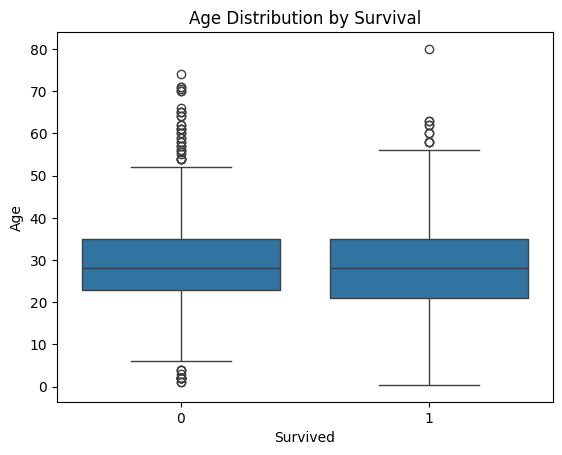

In [166]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

Корреляция признаков

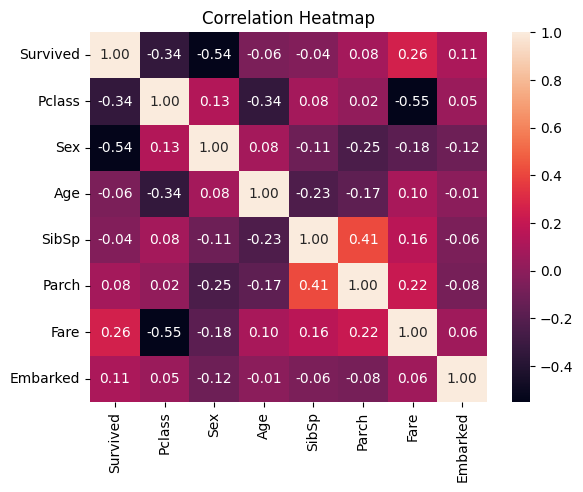

In [167]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

На основе предоставленного графика корреляционной матрицы можно сделать следующие выводы:

* Сильная отрицательная корреляция между Pclass и Fare (-0.55): это указывает на то, что пассажиры с более высокими классами (например, 1-й класс) платили более высокие тарифы.
* Сильная отрицательная корреляция между Survived и Pclass (-0.54): вероятность выживания была выше для пассажиров более высоких классов (1-й класс).

* Сильная положительная корреляция между Parch и SibSp (0.41): люди, путешествовавшие с родителями или детьми, чаще также путешествовали с братьями/сестрами или супругами.
Слабая или отсутствующая корреляция:

* Признаки Age, Embarked имеют очень слабую корреляцию с Survived, что указывает на их незначительное влияние на вероятность выживания.

* Признак Sex имеет значительную отрицательную корреляцию с Survived (-0.54), что подтверждает, что женщины имели большую вероятность выжить, чем мужчины.

Выделим таргеты и инпуты

In [168]:
X = df.drop(columns=['Survived'])
y = df['Survived']

Разделим данные на тест и трейн

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,1,1,54.0,0,0,51.8625,0
718,3,1,28.0,0,0,15.5000,2
685,2,1,25.0,1,2,41.5792,1
73,3,1,26.0,1,0,14.4542,1
882,3,0,22.0,0,0,10.5167,0
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,0
270,1,1,28.0,0,0,31.0000,0
860,3,1,41.0,2,0,14.1083,0
435,1,0,14.0,1,2,120.0000,0


# Классификатор

In [170]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)

print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Precision: 0.8130841121495327
Recall: 0.725
F1: 0.7665198237885462
Accuracy: 0.8203389830508474


Как видно, все полученные метрики выше, чем на паре, так:
- Precision: 0.813 > 0.8
- Recall: 0.725 > 0.72
- F1: 0.767 > 075
- Accuracy: 0.82 > 0.8

# Предобработка данных 2

Заново читаем датасет

In [171]:
df = pd.read_csv('/content/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Чистка данных

In [172]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='male' else 0)
df['Embarked'] = df['Embarked'].apply(lambda x: 0 if x == 'S' else (1 if x == 'C' else 2))
df

<ipython-input-172-3ef2ba7927f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-172-3ef2ba7927f4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


Уберем возрастные выбросы по квантилям

In [173]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удалим выбросы
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

Разобьем на инпуты и таргеты

In [174]:
X = df.drop(columns=['Age'])
y = df['Age']

Трейн/тест сплит

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Регрессия

Скалирование

In [176]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение

In [177]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Оценка

In [178]:
y_pred_scaled = model.predict(X_test_scaled)

rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print('RMSE:', rmse_scaled)

RMSE: 9.486968242935646


Как видно, полученная ошибка ниже, чем на паре, так:
- 9.49 < 10.7

В результате эмпирического подхода, тщательной обработки данных и внимательного подбора гиперпараметров были выбраны и обучены модели. Достигнутые высокие значения метрик подтверждают успешность решения поставленной задач